## Download the CSE-CIC-IDS2018 dataset

In [1]:
# Install AWS CLI (uncomment and run this cell if you haven't installed it yet)
# !../venv/bin/pip install awscli --upgrade

# import os
# import subprocess

# # Define the directory path
# directory = "../data/CSE-CIC-IDS2018"

# # Check if the directory is empty
# if not os.listdir(directory):
#     # Download data from AWS S3 bucket
#     subprocess.run(["aws", "s3", "sync", "--no-sign-request", "--recursive", "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/", directory], check=True)
#     print("Data downloaded successfully.")
# else:
#     print(f"The directory '{directory}' is not empty. Data download skipped.")

## Data Exploration



In [2]:
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath('../'))

from lib.helper_functions import *

In [3]:
# if saved dataframe file exists, load
# if dataframe isn't saved, load raw csv file and save the dataframe
dataframe_file = '../data/flowmeter_dataframe.pkl'
exists = os.path.isfile(dataframe_file)
if exists:
    print('dataframe file exists, loading dataframe...')
    df = pd.read_pickle(dataframe_file)
    print('dataframe loaded.')
else:
    directory = '../data/CIC-DDoS2019'
    df = pd.DataFrame()
    df = read_clean_combine_csv(directory, df, 'Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv')
    # save dataframe to file for future use
    pd.to_pickle(df, dataframe_file)

../data/CIC-DDoS2019\Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv

Memory usage of properties dataframe is : 3561.7681617736816  MB


e:\Documents\Programming\Python\project\AI\SecureStream\lib\helper_functions.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  props[col].replace([np.inf, -np.inf], np.nan, inplace=True)
e:\Documents\Programming\Python\project\AI\SecureStream\lib\helper_functions.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1499.9708909988403  MB
This is  42.11309728401548 % of the initial size


In [4]:
df.columns

Index(['flow_id', 'source_ip', 'source_port', 'destination_ip',
       'destination_port', 'protocol', 'timestamp', 'flow_duration',
       'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes_s',
       'flow_packets_s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets_s', 'bwd_packets_s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
  

In [5]:
df.memory_usage().sum() / 1024**2

np.float64(1464.6355085372925)

In [6]:
len(df)

5557715

In [7]:
df = df.sort_values(by=['timestamp'])

In [8]:
df = df[df['timestamp'] > pd.to_datetime('2018-01-01')]

In [9]:
df.head()

,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,total_backward_packets,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
5216236,NaN,NaN,54346,NaN,53,17,2018-02-20 01:00:00,486,1,1,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4822832,NaN,NaN,65322,NaN,53,17,2018-02-20 01:00:00,21330,1,1,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4732916,NaN,NaN,55824,NaN,53,17,2018-02-20 01:00:00,63552,2,2,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4787821,NaN,NaN,49673,NaN,443,6,2018-02-20 01:00:00,60092004,4,2,...,20,77812.0,0.0,77812,77812,59936464.0,0.0,59936464,59936464,Benign
4869133,NaN,NaN,51125,NaN,443,6,2018-02-20 01:00:00,5717569,8,6,...,20,107471.0,0.0,107471,107471,5610054.0,0.0,5610054,5610054,Benign


In [10]:
# get count of each label
print(df['label'].value_counts())

label
Benign           550000
DrDoS_LDAP       500000
DrDoS_MSSQL      500000
DrDoS_NTP        500000
DrDoS_NetBIOS    500000
DrDoS_SNMP       500000
DrDoS_SSDP       500000
DrDoS_UDP        500000
Syn              500000
TFTP             500000
UDP-lag          330079
Portmap          177197
WebDDoS             439
Name: count, dtype: int64


In [11]:
# get distribution in of each label
print(df['label'].value_counts()/len(df))

label
Benign           0.098962
DrDoS_LDAP       0.089965
DrDoS_MSSQL      0.089965
DrDoS_NTP        0.089965
DrDoS_NetBIOS    0.089965
DrDoS_SNMP       0.089965
DrDoS_SSDP       0.089965
DrDoS_UDP        0.089965
Syn              0.089965
TFTP             0.089965
UDP-lag          0.059391
Portmap          0.031883
WebDDoS          0.000079
Name: count, dtype: float64


## Downsample the dataset to 100K rows

In [12]:
from sklearn.utils import resample

dataframe_file = '../data/multiclassification_dataset.pkl'
exists = os.path.isfile(dataframe_file)
if exists:
    print('100k dataframe file exists, loading dataframe...')
    df = pd.read_pickle(dataframe_file)
    print('dataframe loaded.')
else:
    # Calculate class counts
    class_counts = df['label'].value_counts().to_dict()

    # Total desired number of instances
    total_instances = 50000

    # Calculate the downsampled number of instances for each class
    downsampled_counts = {}
    for label, count in class_counts.items():
        downsampled_counts[label] = min(count, total_instances // len(class_counts))

    # Downsample each class to the desired number of instances
    downsampled_data = pd.DataFrame()
    for label, count in downsampled_counts.items():
        if label != 'Infilteration': 
            class_data = df[df['label'] == label]
            downsampled_data = pd.concat([downsampled_data, resample(class_data,
                                                                replace=False,
                                                                n_samples=count,
                                                                random_state=42)])

    # Shuffle the downsampled data
    downsampled_data = downsampled_data.sample(frac=1, random_state=42)

    # Check the total number of instances
    print("Total number of instances after downsampling:", len(downsampled_data))
    # save dataframe to file for future use
    df = downsampled_data.drop(['destination_port', 'protocol', 'timestamp', 'cwe_flag_count'], axis=1)  # Features
    df.sort_index(axis=1, inplace=True)
    print('The total number of features is:', len(df.columns))
    pd.to_pickle(df, dataframe_file)


Total number of instances after downsampling: 46591
The total number of features is: 80


In [13]:
df.columns

Index(['ack_flag_count', 'act_data_pkt_fwd', 'active_max', 'active_mean',
       'active_min', 'active_std', 'average_packet_size',
       'avg_bwd_segment_size', 'avg_fwd_segment_size', 'bwd_avg_bulk_rate',
       'bwd_avg_bytes_bulk', 'bwd_avg_packets_bulk', 'bwd_header_length',
       'bwd_iat_max', 'bwd_iat_mean', 'bwd_iat_min', 'bwd_iat_std',
       'bwd_iat_total', 'bwd_packet_length_max', 'bwd_packet_length_mean',
       'bwd_packet_length_min', 'bwd_packet_length_std', 'bwd_packets_s',
       'bwd_psh_flags', 'bwd_urg_flags', 'destination_ip', 'down_up_ratio',
       'ece_flag_count', 'fin_flag_count', 'flow_bytes_s', 'flow_duration',
       'flow_iat_max', 'flow_iat_mean', 'flow_iat_min', 'flow_iat_std',
       'flow_id', 'flow_packets_s', 'fwd_avg_bulk_rate', 'fwd_avg_bytes_bulk',
       'fwd_avg_packets_bulk', 'fwd_header_length', 'fwd_iat_max',
       'fwd_iat_mean', 'fwd_iat_min', 'fwd_iat_std', 'fwd_iat_total',
       'fwd_packet_length_max', 'fwd_packet_length_mean',
   

In [14]:
df['label'].value_counts()

label
Benign           3846
DrDoS_LDAP       3846
DrDoS_MSSQL      3846
DrDoS_NTP        3846
DrDoS_NetBIOS    3846
DrDoS_SNMP       3846
DrDoS_SSDP       3846
DrDoS_UDP        3846
Portmap          3846
Syn              3846
TFTP             3846
UDP-lag          3846
WebDDoS           439
Name: count, dtype: int64

## Create the multiclassification model for the threat detection

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode labels to integers
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df['label'].value_counts()

label
10    3846
3     3846
1     3846
7     3846
4     3846
8     3846
2     3846
5     3846
6     3846
11    3846
0     3846
9     3846
12     439
Name: count, dtype: int64

In [16]:
import joblib

# Save the label encoder to a file
label_encoder_file = '../models/label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_file)

['../models/label_encoder.joblib']

In [17]:
from sklearn.model_selection import train_test_split

# Assuming you already have your dataset stored in a pandas DataFrame df
# X contains the features and y contains the labels
X = df.drop(['label'], axis=1)  # Features
y = df['label']                # Labels

# Optionally, you can also specify stratification to ensure class balance in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the train and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (37272, 79)
Shape of X_test: (9319, 79)
Shape of y_train: (37272,)
Shape of y_test: (9319,)


### Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

model_file = '../models/rf_classifier.pkl'

exists = os.path.isfile(model_file)

if exists:
    print('Random Forest model exists, loading model...')
    rf_classifier = pickle.load(open(model_file, 'rb'))
    print('model loaded.')
else:
    print('Random Forest model does not exist, training model...')
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

    # Train the classifier on the training data
    rf_classifier.fit(X_train, y_train)
    print('model trained.')
    # save model to file for future use
    pickle.dump(rf_classifier, open(model_file, 'wb'))

Random Forest model does not exist, training model...
model trained.


#### Model Evaluation

In [19]:
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.740852022749222
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       0.77      0.77      0.77       769
           2       0.97      0.96      0.96       769
           3       0.99      0.99      0.99       770
           4       0.66      0.61      0.63       769
           5       0.73      0.73      0.73       769
           6       0.48      0.48      0.48       770
           7       0.48      0.49      0.49       770
           8       0.66      0.71      0.69       769
           9       0.62      0.62      0.62       769
          10       0.97      0.98      0.97       769
          11       0.53      0.50      0.52       769
          12       0.97      0.99      0.98        88

    accuracy                           0.74      9319
   macro avg       0.76      0.76      0.76      9319
weighted avg       0.74      0.74      0.74      9319



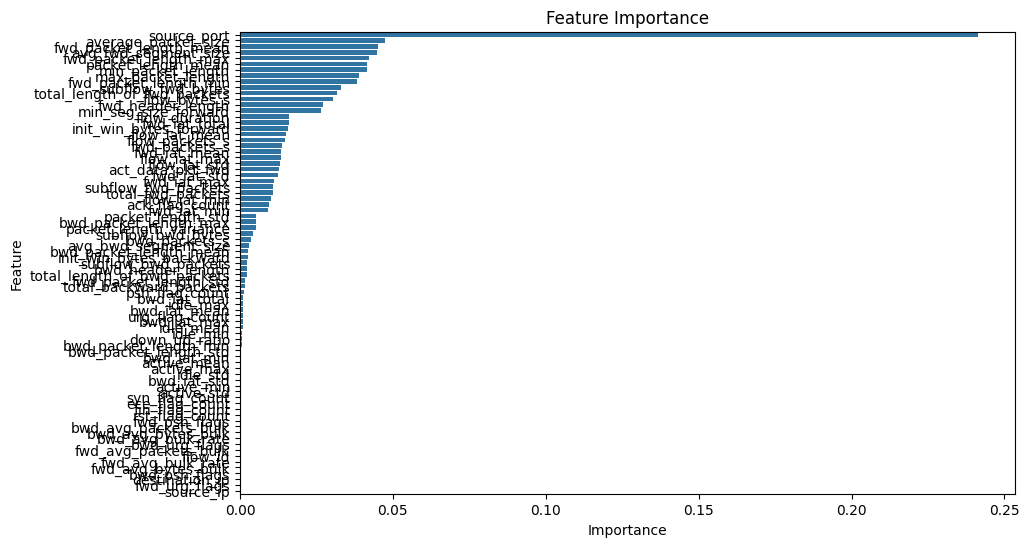

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = rf_classifier.feature_importances_

df_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance_sorted)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Neural Networks

In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Define the number of classes
num_classes = len(set(y_train))

input_shape = X_train.shape[1]


model = keras.Sequential([
    keras.layers.Dense(input_shape, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
932/932 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0836 - loss: 2.5283 - val_accuracy: 0.0822 - val_loss: 2.5152
Epoch 2/100
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0810 - loss: 2.5156 - val_accuracy: 0.0825 - val_loss: 2.5142
Epoch 3/100
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0814 - loss: 2.5156 - val_accuracy: 0.0833 - val_loss: 2.5149
Epoch 4/100
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0824 - loss: 2.5155 - val_accuracy: 0.0846 - val_loss: 2.5144
Epoch 5/100
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0798 - loss: 2.5155 - val_accuracy: 0.0876 - val_loss: 2.5146
Epoch 6/100
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0825 - loss: 2.5154 - val_accuracy: 0.0805 - val_loss: 2.5155
Epoch 7/100
932/932 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0791 - loss: 2.5156 - val_accuracy: 0.0833 - val_loss: 2.5144
Epoch 8/100
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0807 - loss: 2.5156 - val_accu

### XGBoost Classifier

In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Assuming you have already split your data into X_train, X_test, y_train, y_test
# Assuming num_classes is already defined

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes)

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Perform Grid Search Cross Validation
grid_search.fit(X_train, y_train)

# Get best estimator
best_xgb_classifier = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................learning_rate=0.1, subsample=0.5; total time=   6.7s
[CV] END ...................learning_rate=0.1, subsample=0.5; total time=   6.7s
[CV] END ...................learning_rate=0.1, subsample=0.5; total time=   6.7s
[CV] END ...................learning_rate=0.1, subsample=0.5; total time=   6.4s
[CV] END ...................learning_rate=0.1, subsample=0.5; total time=   6.9s
[CV] END ...................learning_rate=0.1, subsample=0.7; total time=   6.9s
[CV] END ...................learning_rate=0.1, subsample=0.7; total time=   7.7s
[CV] END ...................learning_rate=0.1, subsample=0.7; total time=   8.9s
[CV] END ...................learning_rate=0.1, subsample=0.7; total time=   7.6s
[CV] END ...................learning_rate=0.1, subsample=0.7; total time=   7.1s
[CV] END .....................learning_rate=0.1, subsample=1; total time=   5.9s
[CV] END .....................learning_rate=0.1, 

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression(C=0.001, max_iter=1000, solver='saga', l1_ratio=1, verbose=1)  # Increase max_iter if needed

# Train the classifier on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values